# Lab. Ottica: calcolo potenza raccola dal fotodiodo in funzione di theta

Ho usato una singola particella come se fosse un disco di Airy, quindi 
    $$I(\theta)=I_0 \left( \frac{2 J_1(kasin(\theta))}{kasin(\theta)} \right)^2 \,.$$

$I_0$ è l'intensità al centro $\theta =0$ e vale
    $$I_0=\frac{P_0 \sigma}{\lambda ^2 R^2} \,.$$

Mentre $\sigma$ è la sezione d'urto (2 volte la sezione geometrica), $P_0$ la potenza che incide sulla sezione d'urto e viene scatterata, $J_1$ è la funzione di Bessel.

Ho graficato nell'intorno di 0 (tra la prima e la seconda zona scura), di $\pi /2$ e di $\pi$

intensità al centro [W/m2]:  0.7294307773672359
area detector [m2]:  8.109497836466454e-05


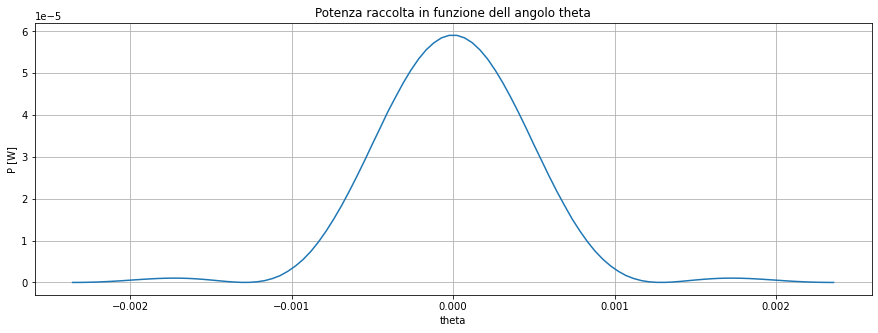

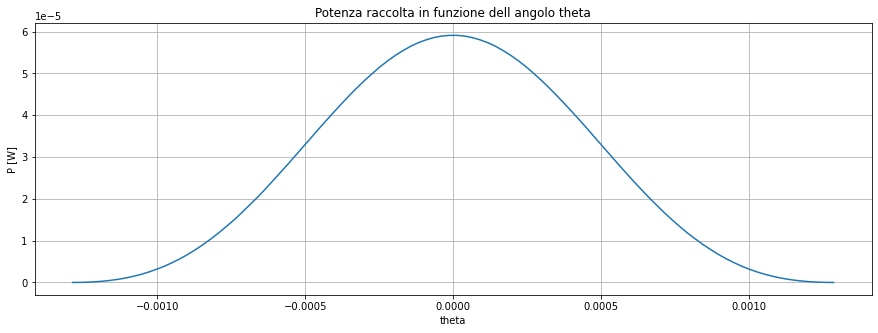

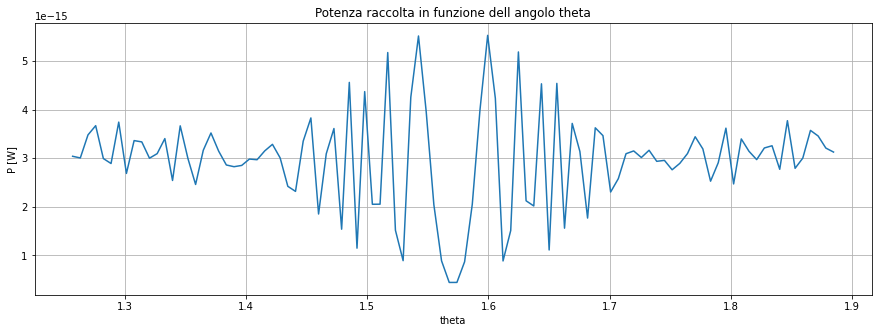

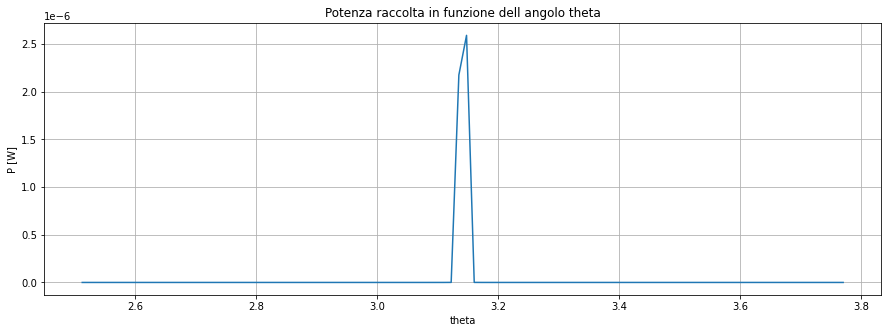

In [22]:
import numpy as np
import scipy.special as sc
import matplotlib.pyplot as plt
#parametri fisici---------------------------------
d=600*10**-6               #d particella [m]
lmbd=632.8* 10**-9       #lambda [m]
R=4.4                    #distanza da detector [m]
d_foc=2.2*10**-2         #diametro focalizzazione [m]
P_laser=5.15*10**-3             #LASER power [W]
sphfrac=1/3000000            #frazione di superficie sferica detector
#omega=1/50              #angolo solido sotteso da detector [sr]
#parametri simulazione----------------------------
M=1000
#-------------------------------------------------
a=d/2                           #raggio particella
k=2*np.pi/lmbd                  #numero d'onda
A_foc=np.pi* (d_foc/2)**2       #area di focalizzazione (cerchio)
I_inc=P_laser/A_foc             #intensità che arriva sul campione
sigma=np.pi*a**2              #sez d'urto = 2* sez geometrica
P_0=I_inc* sigma                #potenza che arriva sul campione e viene scatterata
P_0=20*10**-6
I_0=P_0*sigma/(lmbd*R)**2       #intensità in theta=0
A_det= 4*np.pi*R**2 *sphfrac    #Area detector
#A_det=R**2 * omega

h=6.626*10**-34  #Plank
e=1.6*10**-19    #Carica
n=1              #indice rifrazione Re
c=3*10**8/n      #light speed

black1=np.arcsin(3.832/np.pi*lmbd/d)  #zeri di bessel
black2=np.arcsin(7.016/np.pi*lmbd/d)
black3=np.arcsin(10.173/np.pi*lmbd/d)

#def Pdisc(t): #integrale di I di airy
#    return P_0*(1 - sc.jv(1,k*a*np.sin(t)) **2 - sc.jv(0,k*a*np.sin(t)) **2) #funz pari

def IAiry(t):
    return I_0*( 2*sc.jv(1,k*a*np.sin(t))/(k*a*np.sin(t)) )**2

print('intensità al centro [W/m2]: ',I_0)
print('area detector [m2]: ',A_det)

liminf=np.array([-black2, -black1, 2/5*np.pi, 4/5*np.pi])
limsup=np.array([ black2,  black1, 3/5*np.pi, 6/5*np.pi])

nbins=100
for i in range(len(liminf)):
    theta=np.linspace(liminf[i],limsup[i], nbins)
    halfbin_size= (theta[1]- theta[0])/2
    y=[]
    for i in range(len(theta)):
        s=0
        for j in range(M):
            t=np.random.uniform(theta[i]-halfbin_size, theta[i]+halfbin_size)
            s+=IAiry(t)
        s/=M
        y.append(A_det*s)
        
    plt.figure(figsize=(15,5))
    plt.plot(theta, y)
    plt.xlabel('theta')
    plt.ylabel('P [W]')
    plt.title('Potenza raccolta in funzione dell angolo theta')
    #plt.legend()
    plt.grid(True)
    plt.show()
        
        
#    if (theta[i]-halfbin_size)*(theta[i]+halfbin_size)<0: tmin=0 #trovo angolo più vicino a zero nel bin
#    else: tmin=min( abs(theta[i]-halfbin_size), abs(theta[i]+halfbin_size) )
#    tmax= max( abs(theta[i]-halfbin_size), abs(theta[i]+halfbin_size) )
#    A_ring= 2*np.pi* R**2 *(np.cos(tmin)-np.cos(tmax)) #area dell'anello sferico su cui ho posizionato detector

intensità al centro [W/m2]:  1.3494469381293865


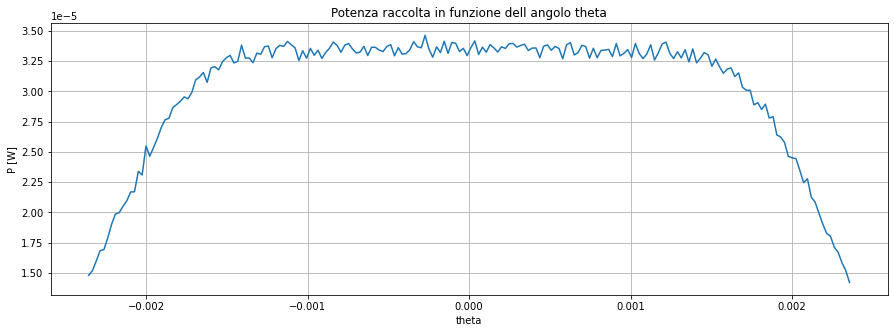

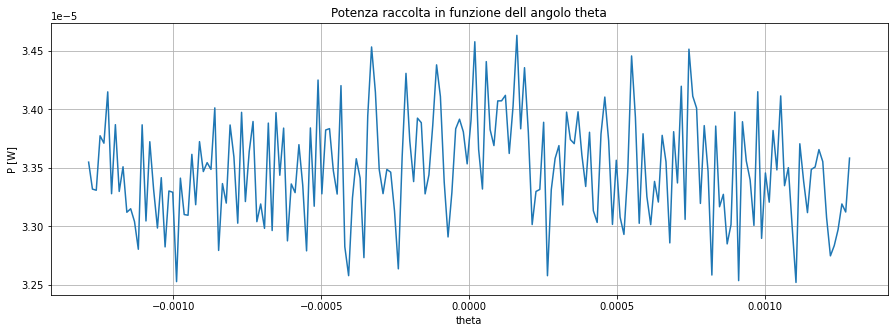

In [6]:
import numpy as np
import scipy.special as sc
import matplotlib.pyplot as plt
#parametri fisici---------------------------------
d=600*10**-6               #d particella [m]
lmbd=632.8* 10**-9       #lambda [m]
R=4.4                    #distanza da detector [m]
l_det=0.01
P_0=37*10**-6            #potenza incidente su disco
#parametri simulazione----------------------------
M=10000
#-------------------------------------------------
a=d/2                           #raggio particella
A_disc=np.pi*a**2               #area disco
k=2*np.pi/lmbd                  #numero d'onda
I_0=P_0*A_disc/(lmbd*R)**2      #intensità in theta=0
A_det=l_det**2                  #Area detector quadrato
theta_det=l_det/R

h=6.626*10**-34  #Plank
e=1.6*10**-19    #Carica
n=1              #indice rifrazione Re
c=3*10**8/n      #light speed

black1=np.arcsin(3.832/np.pi*lmbd/d)  #zeri di bessel
black2=np.arcsin(7.016/np.pi*lmbd/d)
black3=np.arcsin(10.173/np.pi*lmbd/d)

def IAiry(t):
    return I_0*( 2*sc.jv(1,k*a*np.sin(t))/(k*a*np.sin(t)) )**2

print('intensità al centro [W/m2]: ',I_0)

liminf=np.array([-black2, -black1])
limsup=np.array([ black2,  black1])

nbins=200
for i in range(len(liminf)):
    theta=np.linspace(liminf[i],limsup[i], nbins)
    halfbin_size= (theta[1]- theta[0])/2
    y=[]
    for i in range(len(theta)):
        s=0
        for j in range(M):
            t=np.random.uniform(theta[i]-theta_det, theta[i]+theta_det)
            s+=IAiry(t)
        s/=M
        y.append(A_det*s)
        
    plt.figure(figsize=(15,5))
    plt.plot(theta, y)
    plt.xlabel('theta')
    plt.ylabel('P [W]')
    plt.title('Potenza raccolta in funzione dell angolo theta')
    #plt.legend()
    plt.grid(True)
    plt.show()